**Armando Rios Lastiri**

# Tarea 1

## Ejercicio 1 (Algoritmo Aceptación-Rechazo)

Sea $f(x \mid \theta)$ una función de densidad para un conjunto de datos y $\pi(\theta)$ una función de densidad a priori para el parámetro $\theta .$ Dada la muestra $x=x_{1}, \ldots, x_{n}$, la distribución posteriori de $\theta$ es
$$
\pi(\theta \mid x)=\pi\left(\theta \mid x_{1}, \ldots, x_{n}\right) \propto \prod_{i=1}^{n} f\left(x_{i} \mid \theta\right) \pi(\theta)
$$
donde $\prod_{i=1}^{n} f\left(x_{i} \mid \theta\right)=L\left(\theta \mid x_{1}, \ldots, x_{n}\right)$ es la función de verosimilitud.

a) Si $\pi(\theta \mid x)$ es la función objetivo en un algoritmo de Aceptación-Rechazo, y si $\pi(\theta)$ es nuestra función candidato, muestre que la cota superior óptima $M$ es la función de verosimilitud evaluada en el MLE.

En el algortimo de aceptacion-rechazo aceptamos $X=Y$ si se cumple que
$$
U \leq \frac{c f(Y)}{M g(Y)}
$$
Donde la probabilidad de aceptacion es $\frac{c}{M}$. Mientras mas acerque a 1 esta probabilidad mas eficiente es este algoritmo por tanto en caso de que tuvieramos $c=1$ corresponderia a que $g=f$ por lo que podriamos re escribir la desigualdad anterior de la siguiente manera.
$$
0 \leq U \leq \frac{f(Y)}{g(Y)} \leq  1
$$
Para encontrar la cota optima $M$ se debe encontrar $\frac{f(Y)}{g(Y)}$ que se acerque a 1 lo mas posible por lo que debemos de encontrar $max{\frac{f(Y)}{g(Y)}}$  donde $f(Y)=\pi(\theta \mid x)$ y $g(Y)=\pi(\theta)$ 
$$
M_{opt}= \max{\frac{f(Y)}{g(Y)}} = \max{\frac{\pi(\theta \mid x)}{\pi(\theta)}} = \max{\frac{\pi(x\mid \theta ) * \pi(\theta)}{\pi(\theta)}} = \max{\pi(x\mid \theta )}
$$
Por lo que $M_{opt}$ es la funcion de verosimilitud evaluda en el MLE.

b) Para estimar la media de una normal estándar, una distribución a priori robusta es la distribución Cauchy. Dado $X_{i} \sim \mathcal{N}(\theta, 1), \theta \sim \mathcal{C}(0,1)$ la distribución a posteriori es
$$
\pi(\theta \mid x) \propto \frac{1}{\pi} \frac{1}{1+\theta^{2}} \frac{1}{2 \pi} \prod_{i=1}^{n} \exp ^{-\left(x_{i}-\theta\right)^{2} / 2}
$$

Fijemos $\theta_{0}=3, n=10$, y generemos $X_{1}, \ldots, X_{n} \sim \mathcal{N}\left(\theta_{0}, 1\right) .$ Utilice el algoritmo de Aceptación-Rechazo con distribución auxiliar Cauchy $\mathcal{C}(0,1)$ para generar muestras de la distribución a posteriori:

- Genere 10,000 muestras de esta Cauchy, calcule la tasa de aceptación y obtenga la
media de las muestras aceptadas. 

In [1]:
set.seed(0)

Número de generaciones =  448492
Número medio de generaciones =  44.8492
Proporción de rechazos =  0.9777031 


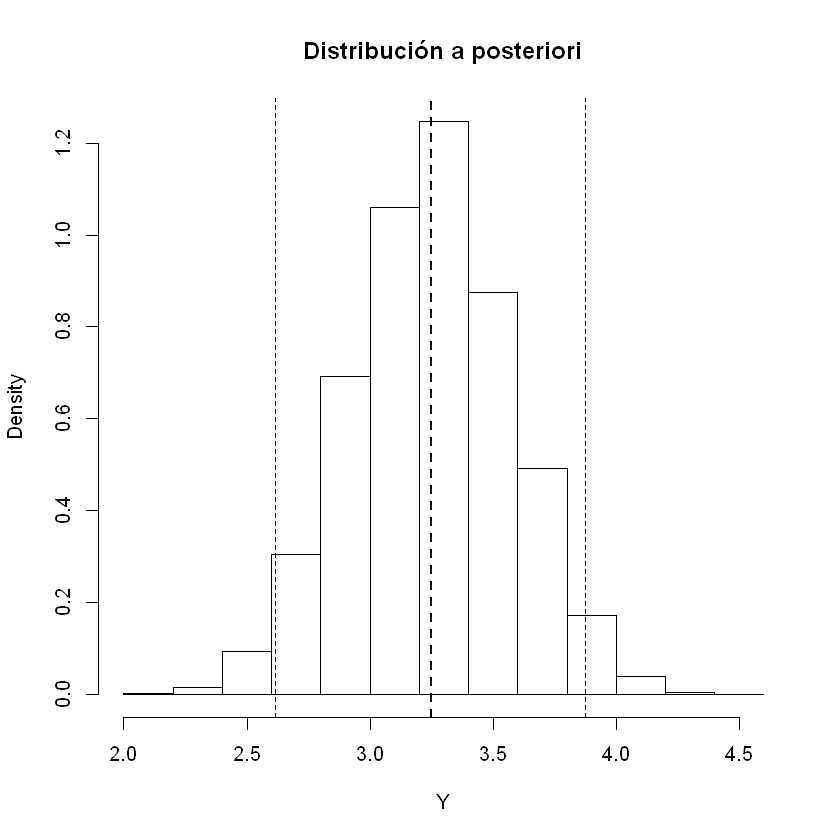

In [2]:
aceptacion.rechazo<-function(media,n,nsim){
    x <-rnorm(n,mean =media,sd = 1)
    # Función de verosimilitud
    lik <-function(mu){(1/(pi*(1+mu^2)))*prod(dnorm(x,mean =mu))}
    # Cota óptima
    # Estimación por máxima verosimilitud
    emv <-optimize(f =lik,int =range(x),maximum =TRUE)
    c <-lik(mean(x))
    ngen <-nsim
    Y <-rcauchy(nsim)
    ind <-(c*runif(nsim)>sapply(Y, lik))# TRUE si no verifica condición

    while(sum(ind)>0){
      le <-sum(ind)
      ngen <-ngen+le
      Y[ind] <-rcauchy(le)
      ind[ind] <-(c*runif(le)>sapply(Y[ind], lik))# TRUE si no verifica condición
    }

    {
      cat("Número de generaciones = ", ngen)
      cat("\nNúmero medio de generaciones = ", ngen/nsim)
      cat("\nProporción de rechazos = ",1-nsim/ngen,"\n")
    }

    q <-quantile(Y,c(0.025,0.975))
    hist(Y,freq=FALSE,main="Distribución a posteriori")
    abline(v =mean(Y),lty =2,lwd =2)
    abline(v =q,lty =2)
    return (Y)
}

mu0 <-3
n<-10
nsim <-10000
aceptacion_rechazo10=aceptacion.rechazo(mu0,n,nsim)

- Evalúe qué tan bien se aproxima esta media a $\theta_{0}$. 

In [3]:
cat("Aproximacion de la media = ", mean(aceptacion_rechazo10))

Aproximacion de la media =  3.247595

- Repita los dos procedimientos anteriores pero ahora contemplando n = 100 y
n = 500 para las muestras iniciales X1, … , Xn. ¿Qué tanto se mejora esta estimación
al aumentar el número de muestras n? 

Para 100 muestras.

Número de generaciones =  1242523
Número medio de generaciones =  124.2523
Proporción de rechazos =  0.9919519 


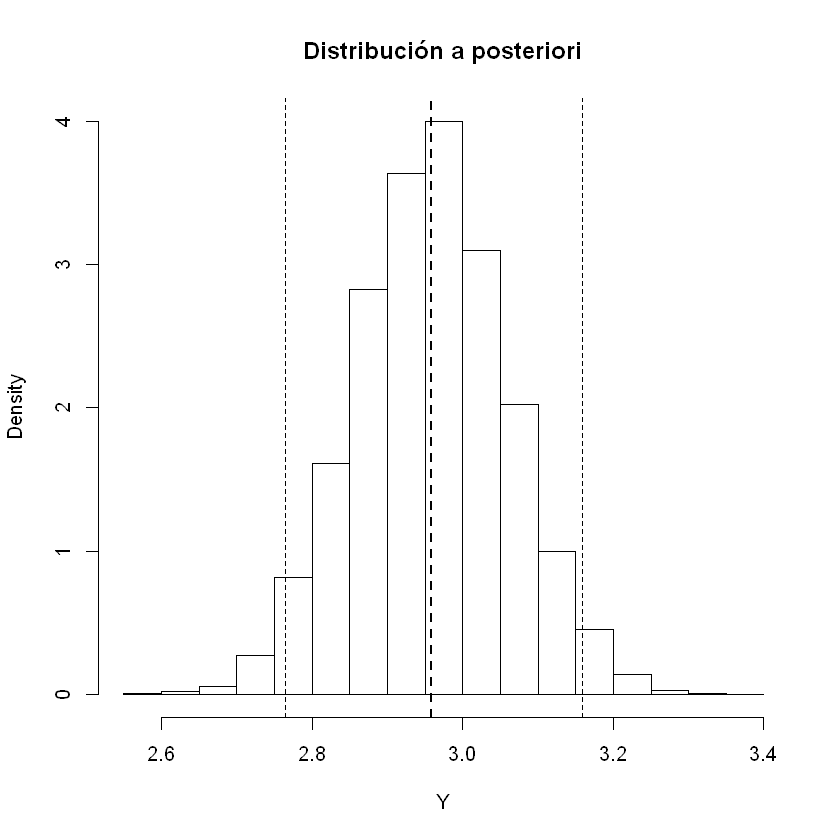

In [4]:
mu0 <-3
n<-100
nsim <-10000
aceptacion_rechazo100=aceptacion.rechazo(mu0,n,nsim)

In [5]:
cat("Aproximacion de la media = ", mean(aceptacion_rechazo100))

Aproximacion de la media =  2.959028

Para 500 muestras.

Número de generaciones =  2769618
Número medio de generaciones =  276.9618
Proporción de rechazos =  0.9963894 


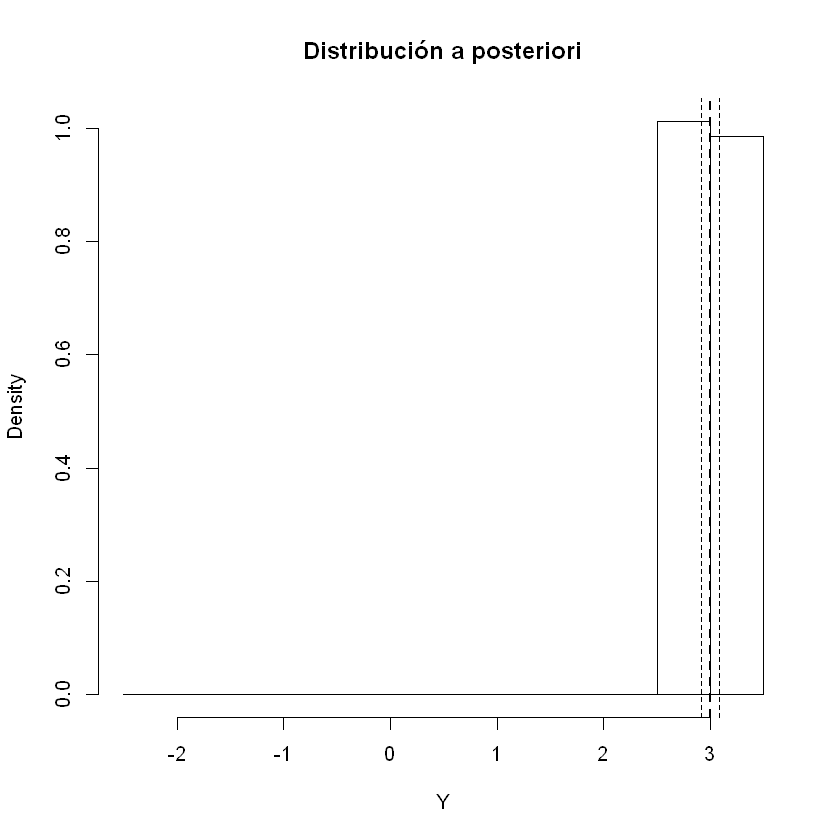

In [6]:
mu0 <-3
n<-500
nsim <-10000
aceptacion_rechazo500=aceptacion.rechazo(mu0,n,nsim)

In [7]:
cat("Aproximacion de la media = ", mean(aceptacion_rechazo500))

Aproximacion de la media =  2.995494

## Ejercicio 2 (Transformada Inversa y muestreo por importancia)

a) Muestre que para simular $Y \sim \operatorname{Exp}^{+}(a, 1)$, una distribución truncada por la izquierda por $a$, basta con simular $X \sim \operatorname{Exp}(1)$  y tomar $Y=a+X$.

Queremos demostrar $\lambda e^{-\lambda (y-a)} $

Sabemos que $f(x)=\lambda e^{-\lambda x} \quad x \geq 0$
$$
F(y)=P(y \leq a+X)=P(X > y-a)=1-F(y-a)=
1-(1-\lambda e^{-\lambda x}) =\lambda e^{-\lambda (y-a)} 
$$

b) Use el método de muestreo por importancia proponiendo una variable aleatoria $X$ adecuada para calcular la probabilidades $P(U>25)$ y $P(T>50) \operatorname{con} U \sim \chi_{3}^{2}$ y $T \sim t_{5} .$

Para $P(U>25)$ con $U \sim \chi_{3}^{2}$ se propuso $X \sim Cauchy (x_{0}=0,\gamma=2.5)$

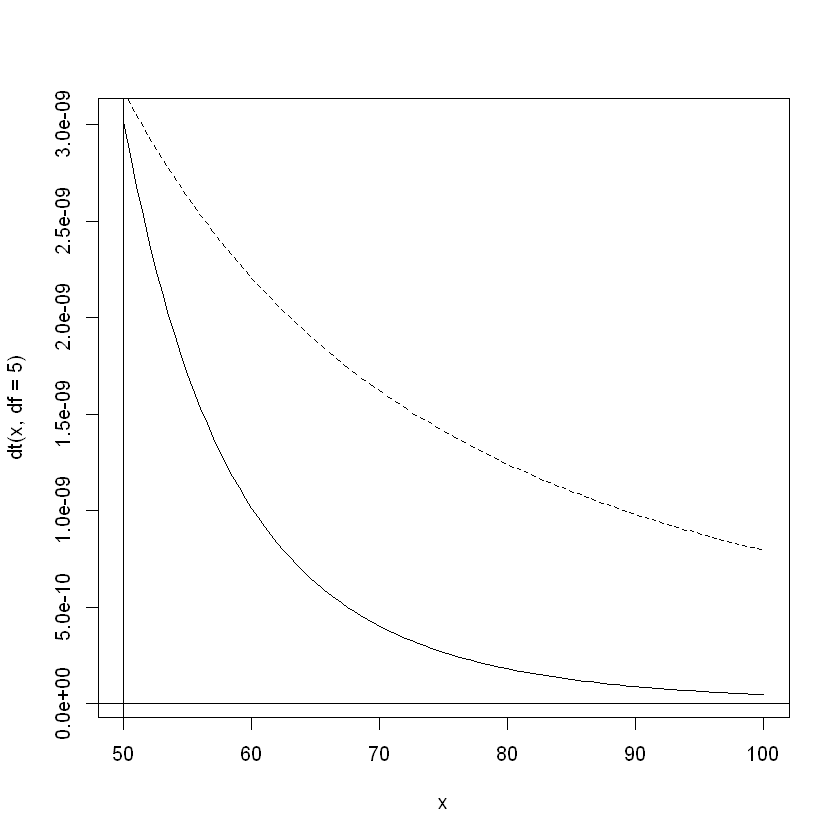

In [8]:
x<-rcauchy(1000)
escala<-0.00001
inicio<-50
fin<-100
nsim <- 10^3

curve(dt(x,df=5), inicio, fin) #P(T>50)
curve(dcauchy(x,scale = 2.5)*escala,inicio,fin ,add = TRUE, lty = 2)
abline(v = inicio)#Linea vertical del truncamiento
abline(h = 0)#Linea horizontal del origen

Aproximación por simulacion:  1.785057 
Error estandar de la aproximación:  0.03414086

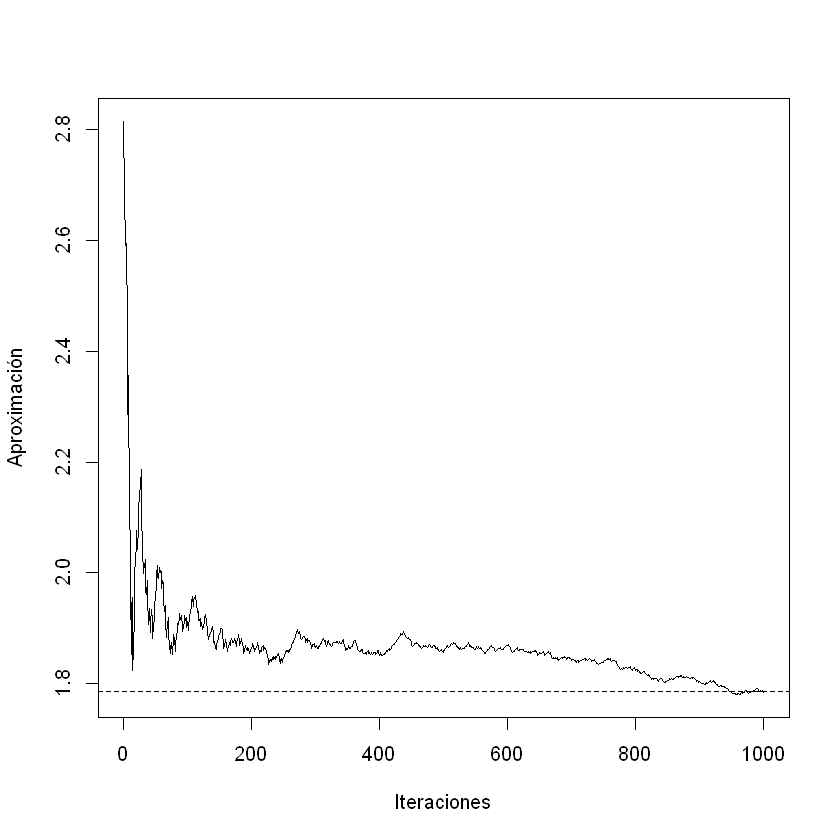

In [9]:
y <- rcauchy(nsim)
w <- dt(y,df=5)/dcauchy(y,scale = 2.5)
plot(cumsum(w)/1:nsim, type = "l", ylab = "Aproximación", xlab = "Iteraciones")
abline(h =mean(w), lty = 2)

#mean(w * h(y))
cat("Aproximación por simulacion: ",mean(w),"\n" )

# sd(w*h(y))/sqrt(nsim)
cat("Error estandar de la aproximación: ", sqrt(var(w)/nsim) )

Para $P(T>50)$ con $T \sim t_{5}$ se propuso $X \sim N (\mu=25,\sigma=5)$.

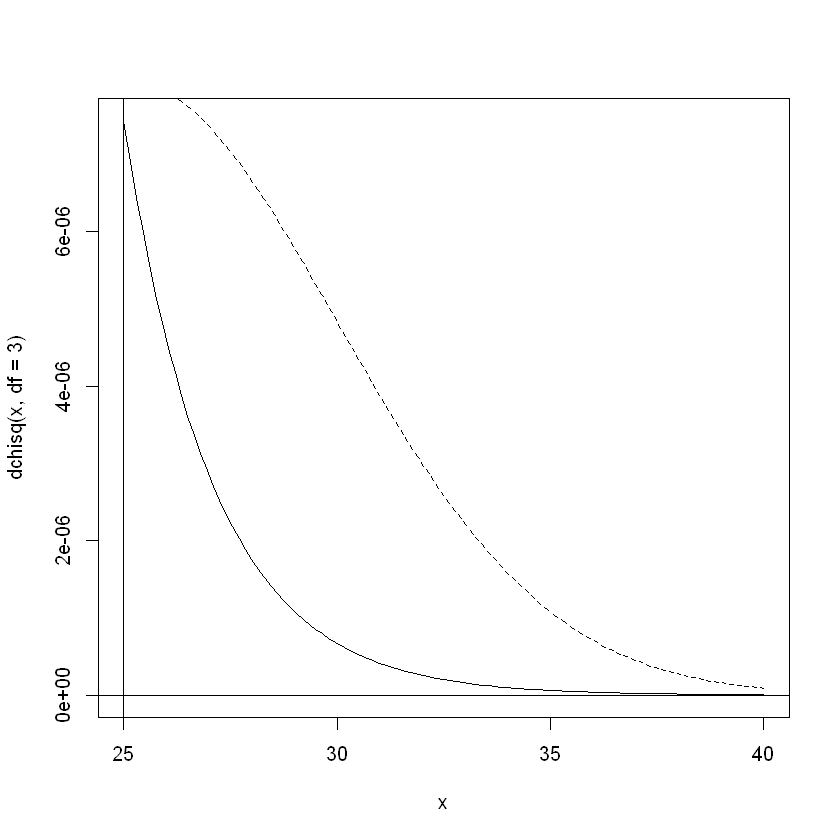

In [10]:
x<-rnorm(1000)
inicio<-25
fin<-40
nsim <- 10^3
escala<-0.0001

curve(dchisq(x,df=3), inicio, fin) #P(U>25)
curve(dnorm(x,mean = 25,sd = 5)*escala, inicio, fin ,add = TRUE, lty = 2) 
abline(v = inicio)
abline(h = 0)

Aproximación por simulacion:  16.67015 
Error estandar de la aproximación:  0.5927664

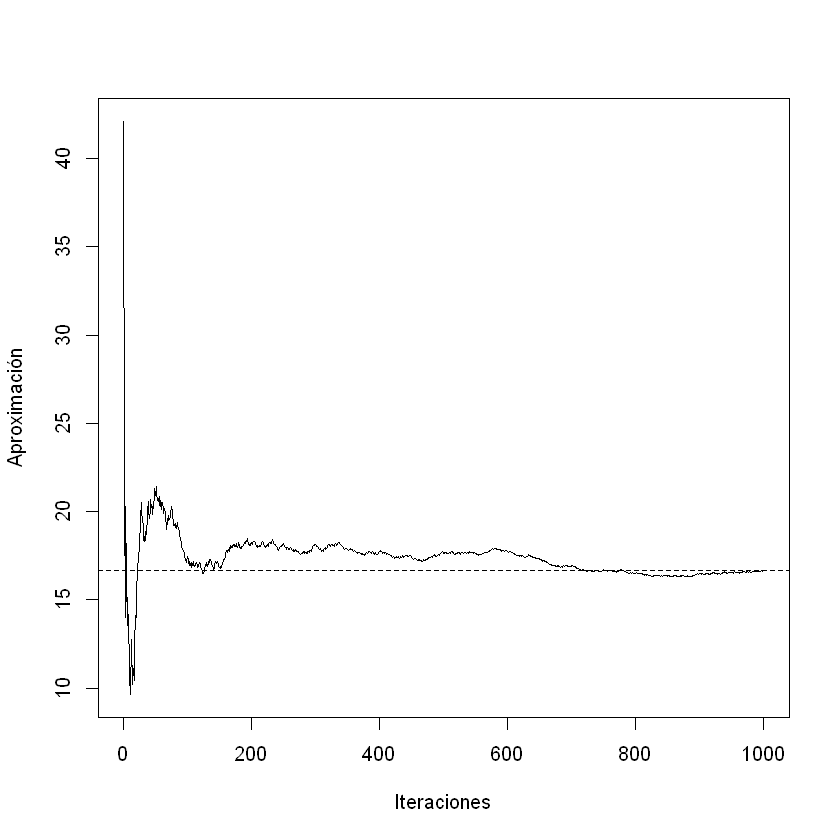

In [11]:
y <- rnorm(nsim) # Y ~ g
w <- dchisq(x,df=3)/dnorm(x,mean = 25,sd = 5)*escala
plot(cumsum(w)/1:nsim, type = "l", ylab = "Aproximación", xlab = "Iteraciones")
abline(h =mean(w), lty = 2)

#mean(w * h(y))
cat("Aproximación por simulacion: ",mean(w) ,"\n")

# sd(w*h(y))/sqrt(nsim)
cat("Error estandar de la aproximación: ", sqrt(var(w)/nsim) )

## Ejercicio 3 (Técnicas de reducción de varianza)

Queremos calcular la siguiente integral vía Monte-Carlo:
$$
\mu=\int_{0}^{1} g(x)=\int_{0}^{1}(1-x) e^{-x^{2}} d x=0.4307639
$$

1) Exprese la integral anterior en términos de la esperanza de una variable aleatoria con soporte en el intervalo [0, 1]. 

$$
\mu=\int_{0}^{1} h(x) d x\\
$$
    Si  $x_{1}, x_{2}, \ldots, x_{n}$  i.i.d. $\mathcal{U}(0,1)$ entonces:
$$
\mu=E(h(\mathcal{U}(0,1))) \approx \frac{1}{n} \sum_{i=1}^{n} h\left(x_{i}\right)
$$

2) En todos los casos, obtenga el error de la estimación del 95 % * y considere n = 1, 000 número de muestras a generar:

Graficamos la funcion que queremos estimar.

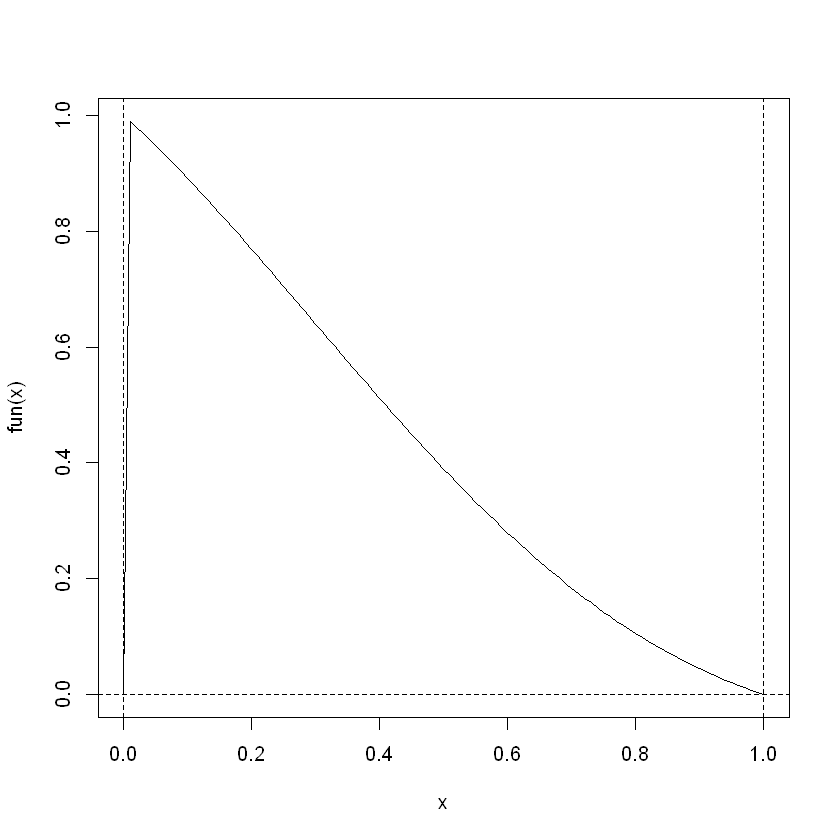

In [12]:
n<-1000 #muestras
fun <- function(x) ifelse((x > 0) & (x < 1), (1-x)*exp(-x^2), 0)
curve(fun, 0, 1)
abline(h = 0, lty = 2)
abline(v = c(0, 1), lty = 2)

In [14]:
mc.uniformes <- function(fun, a, b, n) {
    x<- runif(n, a, b)
    fx <- sapply(x, fun) 
    return(mean(fx) * (b - a))
}
mc_uniformes<-mc.uniformes(fun, 0, 1, n)
cat("Estimacion de μ con Monte-Carlo utilizando variables aleatorias uniformes: ", mean(mc_uniformes))

Estimacion de µ con Monte-Carlo utilizando variables aleatorias uniformes:  0.4296851

a) Estime $\mu$  usando el método de aceptación rechazo en el cuadrado $[0, 1]^2$


In [15]:
aceptacion.rechazo<-function(fun,media,n,nsim){
    x <-rnorm(n,mean =media,sd = 1)
    emv <-optimize(f =fun,int =range(x),maximum =TRUE)
    c <-fun(mean(x))
    ngen <-nsim
    Y <-runif(n, 0, 1)
    ind <-(c*runif(nsim)>sapply(Y, fun))

    while(sum(ind)>0){
      le <-sum(ind)
      ngen <-ngen+le
      Y[ind] <-rcauchy(le)
      ind[ind] <-(c*runif(le)>sapply(Y[ind], lik))
    }
    return (Y)
}

mu0 <-3
nsim <-10000
aceptacion_rechazo_cuadrado<-aceptacion.rechazo(fun,mu0,n,nsim)
cat("Estimacion de μ con Monte-Carlo en el cuadrado [0,1]: ", mean(aceptacion_rechazo_cuadrado))

Estimacion de µ con Monte-Carlo en el cuadrado [0,1]:  0.5007189

b) Estime $\mu$ por el método de Monte-Carlo crudo utilizando variables aleatorias uniformes.


In [16]:
mc.uniformes <- function(fun, a, b, n, plot = TRUE) {
    fx <- sapply(runif(n, a, b), fun) * (b - a)
    estint <- cumsum(fx)/(1:n)
    return (estint)
}
mc_uniformes<-mc.uniformes(fun, 0, 1, n)
cat("Estimacion de μ con Monte-Carlo crudo utilizando variables aleatorias uniformes: ", mean(mc_uniformes))

Estimacion de µ con Monte-Carlo crudo utilizando variables aleatorias uniformes:  0.4072397

c) Estime $\mu$ utilizando variables antitéticas.


In [17]:
variables.antiteticas<-function(ftn, a, b, n){
    x <- runif(n%/%2, a, b)
    x <- as.numeric(matrix(c(x,a+b-x),nrow=2,byrow=TRUE))
    fx <- sapply(x, ftn)*(b-a)
    estint <- cumsum(fx)/(1:n)
    return (estint)
}
variables_antiteticas<-variables.antiteticas(fun, 0, 1, n)
cat("Estimacion de μ con variables antitéticas: ", mean(variables_antiteticas))

Estimacion de µ con variables antitéticas:  0.4296093

d) Estime $\mu$ con el método de variables de control, con $W = f (x)$ variable de control,
donde $f (x) = 1 − x$. 

In [18]:
g <- function(x) ifelse((x > 0) & (x < 1), (1-x)*exp(-x^2), 0)
f <- function(x) ifelse((x > 0) & (x < 1), 1-x, 0)
u <- runif(n, 0,1)
B<-f(u)
A<-g(u)
cor(A,B)

[1] 0.9925498

In [19]:
a<- -cov(A, B)/var(B)
g_u <- g(u)
variables_control<-g_u+a*(B-mean(B))
cat("Estimacion de μ con variables de control: ", mean(variables_control))

Estimacion de µ con variables de control:  0.4164165

e) Compare los errores de estimación de cada uno de los estimadores utilizados. ¿Cuál
muestra tener menor error? 

In [20]:
error.estimacion<-function(Y,n){
    s<-sd(Y)
    return ((1.96*s)/sqrt(n))
}

In [21]:
cat("Aceptacion Rechazo = ", error.estimacion(aceptacion_rechazo_cuadrado,n),"\n")
cat("Monte-Carlo con variables aleatorias uniformes ",error.estimacion(mc_uniformes,n),"\n")
cat("Variables antitéticas: ", error.estimacion(variables_antiteticas,n),"\n")
cat("Variables de control: ", error.estimacion(variables_control,n),"\n")

Aceptacion Rechazo =  0.01744324 
Monte-Carlo con variables aleatorias uniformes  0.001605793 
Variables antitéticas:  0.0009094162 
Variables de control:  0.002298542 


Los metodos de reducción de varianza tienen el menor error de estimación, siendo el metodo de las variables antitéticas el que tiene el menor error.

3) Grafique la convergencia ergódica de cada una de estos estimadores. ¿Cuál de estos resulta ser menos costoso para la estimación de $\mu$? 

Estimacion de μ con Monte-Carlo en el cuadrado $[0,1]^2$

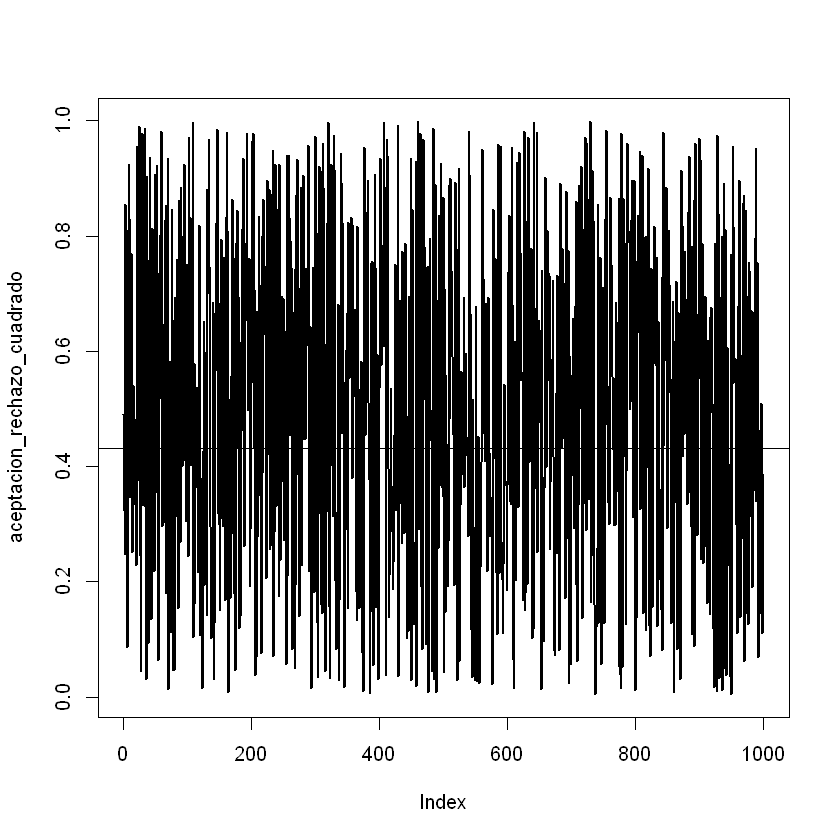

In [22]:
plot(aceptacion_rechazo_cuadrado,type="l", lwd = 2)
abline(h = 0.4307639)#Linea horizontal del origen

Estimacion de μ con Monte-Carlo crudo utilizando variables aleatorias uniformes

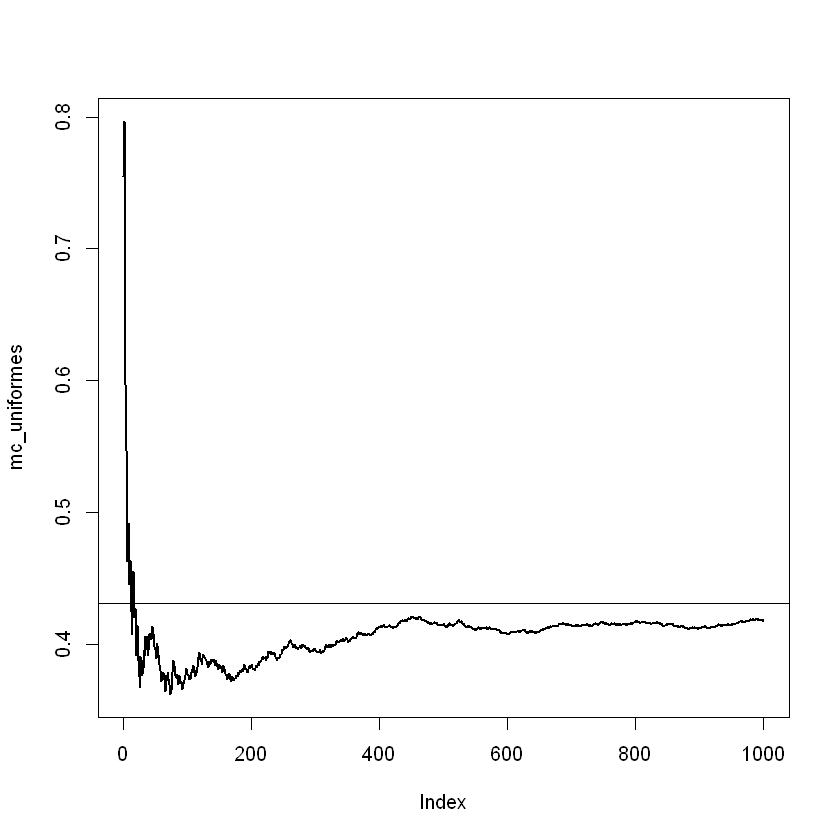

In [23]:
plot(mc_uniformes,type="l", lwd = 2)
abline(h = 0.4307639)

Estimacion de μ con variables antitéticas

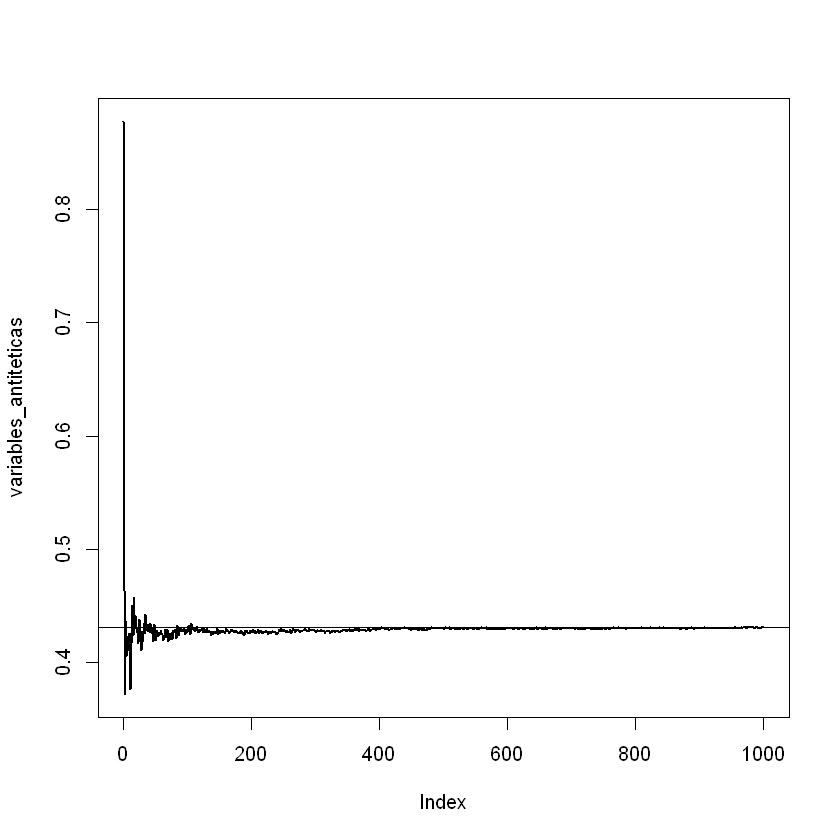

In [24]:
plot(variables_antiteticas,type="l", lwd = 2)
abline(h = 0.4307639)

Estimacion de μ con variables de control

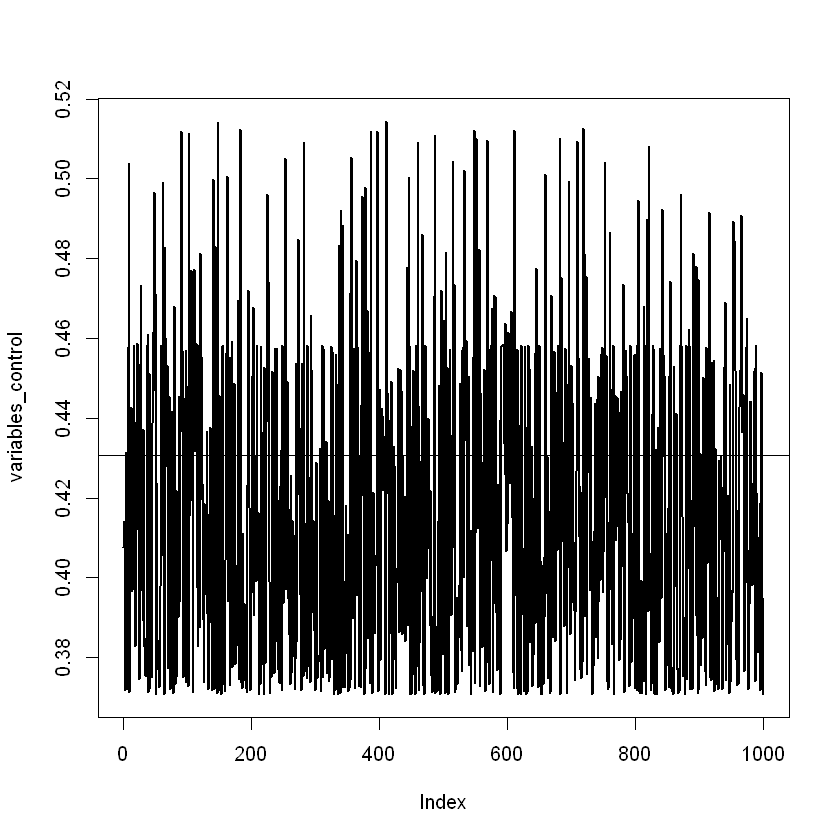

In [25]:
plot(variables_control,type="l", lwd = 2)
abline(h = 0.4307639)

El método de variables antitéticas converge mas rapido al rededor de las 400 muestras por lo que es el método menos costoso para la estimación de $\mu$